<a href="https://colab.research.google.com/github/diegoax/ALNAE-2025/blob/main/notebooks/clase4_ALNAE_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Clase 4** (Miércoles 26 de marzo de 2025)
---


## Snapshot de la eliminación Gaussiana y la Factorización $A = LU$

La eliminación gaussiana es un método fundamental para resolver sistemas lineales de la forma $Ax = b$. Dado un sistema con una matriz cuadrada $A$ de tamaño $n \times n$ y un vector columna $b$ de tamaño $n$, buscamos el vector solución $x$ tal que $Ax = b$.

## Objetivo

El propósito de esta sección es entender cómo cada paso de la eliminación puede verse como la resta de una matriz de **rango 1**. En cada etapa reducimos el tamaño del sistema, eliminando una variable y obteniendo un nuevo sistema más pequeño, hasta llegar a una ecuación de 1x1.

### Idea clave

Cada paso de la eliminación resta una matriz del tipo $ℓu^T$, donde:
- $ℓ$ es un vector columna que representa los múltiplos que se aplican a una fila pivote.
- $u^T$ es un vector fila que representa la fila pivote original.

Este proceso lleva a la descomposición:

$$
A = L U
$$

donde:
- $L$ es una matriz triangular inferior con unos en la diagonal.
- $U$ es una matriz triangular superior.

## Eliminación como suma de matrices de rango 1

La matriz $A$ se puede expresar como:

$$
A = \ell_1 u_1^T + \ell_2 u_2^T + \ell_3 u_3^T + \ell_4 u_4^T
$$

Cada término $\ell_i u_i^T$ representa el aporte de una etapa de eliminación, eliminando entradas por debajo de un pivote.

## Ejemplo:

Para eliminar las entradas debajo del primer pivote:

$$
A =
\begin{bmatrix}
1 & 2 & 3 \\
2 & 5 & 7 \\
2 & 7 & 8
\end{bmatrix}
\to
\text{Resta una matriz de rango 1: } \ell_1 u_1^T
$$

Donde:

$$
\ell_1 =
\begin{bmatrix}
1 \\
2 \\
2
\end{bmatrix}, \quad
u_1^T = \text{fila 1 de } A
$$


In [ ]:
A=[ 1 2 3; 2 5 7; 2 7 8]

3×3 Matrix{Int64}:
 1  2  3
 2  5  7
 2  7  8

In [ ]:
l1=[1,2,2];
u1=A[1,:];
B=A-l1*u1'

3×3 Matrix{Int64}:
 0  0  0
 0  1  1
 0  3  2

Por lo tanto tenemos que
$$
A=\ell_1u_1^T +\begin{bmatrix}
0 & 0 & 0 \\
0 & \boxed{A_2}
\end{bmatrix}
$$

Una vez eliminadas las entradas bajo el primer pivote, se trabaja con la submatriz $A_2$ restante. Se usa un nuevo vector $\ell_2$ y fila pivote $u_2^T$ para eliminar los elementos bajo el segundo pivote.

Observando la matriz
$$
A_2=\begin{pmatrix} 1&1\\3&2\end{pmatrix}
$$
 vemos que basta definir
 $$
\ell_2=\begin{pmatrix}0\\1\\3\end{pmatrix};
u2^T=(0,1,1);
 $$

In [ ]:
l2=[0,1,3];
u2=[0,1,1];
A-l1*u1'-l2*u2'

3×3 Matrix{Int64}:
 0  0   0
 0  0   0
 0  0  -1

In [ ]:
#Luego definiendo
l3=[0,0,1]
u3=[0,0,-1]
A-l1*u1'-l2*u2'-l3*u3'



3×3 Matrix{Int64}:
 0  0  0
 0  0  0
 0  0  0

In [ ]:
L=zeros(3,3)
L[:,1]=l1
L[:,2]=l2
L[:,3]=l3
L

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 2.0  1.0  0.0
 2.0  3.0  1.0

In [ ]:
U=[u1';u2';u3']

3×3 Matrix{Int64}:
 1  2   3
 0  1   1
 0  0  -1

In [ ]:
A-L*U

3×3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

**Comentario:** Recordar que a veces necesitamos pivotear las columnas de $A$ para que el proceso siempre pueda seguir. En tal caso puede premultiplicar por una permutación.

Resulta que para toda matriz $A$ invertible, existe una matriz $P$ de permutación tal que $PA=LU$.
(Ver libro de Trefethen-Bau para más detalles.)



---






# Los Cuatro Subespacios Fundamentales

Esta sección  trata sobre "un panorama" básico sobre las piezas básicas de las matrices (o transformaciones lineales). Esta visión muestra cómo toda matriz $A$ de tamaño $m \times n$ (mapa de $\mathbb{R^n}$ en $\mathbb{R}^m$) tiene asociado **cuatro subespacios** fundamentales: dos subespacios del dominio $\mathbb{R}^n$ y dos más del codominio $\mathbb{R}^m$.

Veamos primero el caso de una matriz de rango 1, $A = uv^T$:
- el espacio columna es la recta generada por $u$
- el espacio fila es la recta generada por $v$.

---



### 📘**Ejemplo 1**

Sea
$$
A = \begin{bmatrix} 1 & 2 \\ 3 & 6 \end{bmatrix} = uv^T
$$
Entonces $m = 2$ y $n = 2$, por lo tanto los subespacios están en $\mathbb{R}^2$.

1. **El espacio columna** $\mathcal{C}(A)$ es la recta generada por
   $$
   u = \begin{bmatrix} 1 \\ 3 \end{bmatrix}
   $$

2. **El espacio fila** $\mathcal{C}(A^T)$ es la recta generada por
   $$
   v = \begin{bmatrix} 1 \\ 2 \end{bmatrix}
   $$

3. **El espacio nulo** $\mathcal{N}(A)$ es la recta generada por
   $$
   x = \begin{bmatrix} 2 \\ -1 \end{bmatrix}
   \quad \text{tales que} \quad Ax = 0
   $$

4. **El espacio nulo izquierdo** $\mathcal{N}(A^T)$ es la recta generada por
   $$
   y = \begin{bmatrix} 3 \\ -1 \end{bmatrix}
   \quad \text{tales que} \quad A^T y = 0
   $$

---



### **Resumen de definiciones**

- El **espacio columna** $\mathcal{C}(A)$ contiene todas las combinaciones lineales de las columnas de $A$.
- El **espacio fila** $\mathcal{C}(A^T)$ contiene todas las combinaciones lineales de las columnas de $A^T$.
- El **núcleo** $\mathcal{N}(A)$ contiene todas las soluciones $x$ a la ecuación $Ax = 0$.
- El **núcleo** $\mathcal{N}(A^T)$ contiene todas las soluciones $y$ a la ecuación $A^T y = 0$. (Observar que los vectores $y$ tienen las dimensiones de los vectores de la imágen. En particular este núcleo son las posibles combinaciones lineales de las filas de $A$ que dan $0$)



In [ ]:
using LinearAlgebra

In [ ]:
u=[1,3]
v=[1,2]
A=u*v'

2×2 Matrix{Int64}:
 1  2
 3  6

In [ ]:
x=[2,-1]
y=[3,-1]
println(A*x)
println(A'*y)

[0, 0]
[0, 0]


Una obsevación importante, que la mencionamos por arriba en la clase anterior, es que $\mathcal{N}(A)$ es ortogonal a la imagen de $A^T$ dando una descomposición del dominio en subespacios ortogonales.

In [ ]:
z_dom=rand(2,1) # tomemos un punto al azar en el dominio
dot(A'*z_dom,x)

0.0

Análogmente, veamos que la imagen de $A$ es ortogonal al núcleo de $A^T$, i.e., $C(A) \perp \mathcal{N}(A^T)$.

In [ ]:
z_im=rand(2,1) # tomemos un punto al azar en el dominio
dot(A*z_im,y)

0.0

---

### **Figura: Los Cuatro Subespacios Fundamentales**


*Figura: Los cuatro subespacios fundamentales (4 rectas infinitas) para la matriz $A = \begin{bmatrix} 1 & 2 \\ 3 & 6 \end{bmatrix}$.*


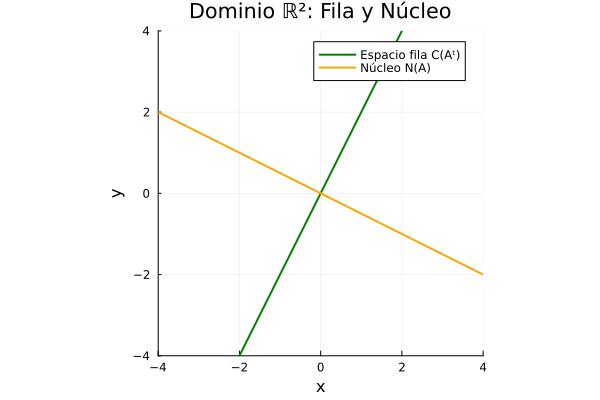

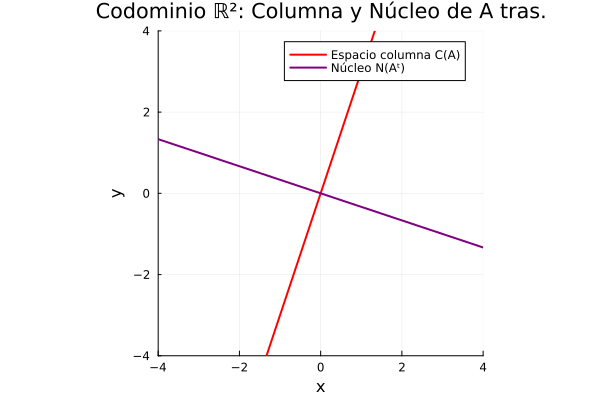

In [ ]:
using Plots

# Función para graficar líneas desde un vector base
function plot_line(vec; color=:blue, label="")
    scale = -4:0.1:4
    points = [s * vec for s in scale]
    xs = [p[1] for p in points]
    ys = [p[2] for p in points]
    plot!(xs, ys, label=label, lw=2, color=color)
end

# ----------- 1. DOMINIO: C(Aᵗ) y N(A) en ℝ² ----------------
plt1 = plot(xlim=(-4, 4), ylim=(-4, 4), aspect_ratio=1,
            title="Dominio ℝ²: Fila y Núcleo", xlabel="x", ylabel="y", legend=:topright)

plot_line(v, color=:green, label="Espacio fila C(Aᵗ)")
plot_line(x, color=:orange, label="Núcleo N(A)")

display(plt1)

# ----------- 2. CODOMINIO: C(A) y N(Aᵗ) en ℝ² ---------------
plt2 = plot(xlim=(-4, 4), ylim=(-4, 4), aspect_ratio=1,
            title="Codominio ℝ²: Columna y Núcleo de A tras.", xlabel="x", ylabel="y", legend=:topright)

plot_line(u, color=:red, label="Espacio columna C(A)")
plot_line(y, color=:purple, label="Núcleo N(Aᵗ)")

display(plt2)


Recordar que el producto interno de dos vectores en $\mathbb{R}^n$ lo podemos escribir como $\langle u,v\rangle$, y en manera matricial:
$$
\langle u,v\rangle=v^Tu.
$$

## 📘 Ejemplo 2:

Sea la matriz

$$
B = \begin{bmatrix}
1 & -2 & -2 \\
3 & -6 & -6
\end{bmatrix}, \quad \text{con } m = 2, \, n = 3.
$$

Entonces $B$ tiene 2 filas y 3 columnas. El espacio columna de $B$ está en $\mathbb{R}^2$ y el espacio fila en $\mathbb{R}^3$. Ambas filas son múltiples una de la otra, por lo que el rango es 1:

$$
\text{rango}(B) = 1.
$$

---

### Veamos el núcleo de $B$#

Como tenemos $n = 3$ incógnitas y $r = 1$ ecuación independiente (ambas ecuaciones son equivalentes), el sistema $Bx = 0$ tiene $n - r = 2$ soluciones independientes.

Buscamos:

$$
Bx =
\begin{bmatrix}
1 & -2 & -2 \\
3 & -6 & -6
\end{bmatrix}
\begin{bmatrix}
a \\
b \\
c
\end{bmatrix}
= 0.
$$

Una base del espacio nulo está dada por las **soluciones especiales**:

$$
x_1 =
\begin{bmatrix}
2 \\
1 \\
0
\end{bmatrix},
\quad
x_2 =
\begin{bmatrix}
2 \\
0 \\
1
\end{bmatrix}.
$$

---

### ✏️ Observación

Estos vectores están en el nullspace de $B$, es decir:

$$
B x_1 = 0, \quad B x_2 = 0.
$$

Pero **no son ortogonales entre sí**. Para obtener una base ortonormal, se puede aplicar el proceso de Gram-Schmidt.

---


In [ ]:
B=[1 -2 -2; 3 -6 -6]
x1=[2,1,0]
x2=[2,0,1]
println(B*x1,B*x2)

[0, 0][0, 0]


In [ ]:
v=[1,-2,-2]

3-element Vector{Int64}:
  1
 -2
 -2

In [ ]:
println(dot(x1,v))
println(dot(x2,v))

0
0



### 📐 Interpretación geométrica

El núcleo $N(B)$ es un plano en $\mathbb{R}^3$ generado por los vectores $\{x_1, x_2\}$. Además tenemos que el vector fila $v$ es ortogonal a estos vectores y por lo tanto ortogonal al núcleo.

De esta forma tenemos:
- $x_1$ y $x_2$ estén en el plano $N(B)$,
- $v$ (vector fila de $B$) sea ortogonal a ese plano.

Concluimos que
$$
\{v_1, v_2, v_3\} \quad \text{base de } \mathbb{R}^3.
$$

---

### 📊 Resumen de dimensiones

- $n = 3$: número de columnas de $B$
- rango de $B$ es $1$.
- $r = 1$: número de filas independientes (rango)
- $\text{dim}(N(B)) = n - r = 2$

Y concluimos que  el núcleo es un plano en $\mathbb{R}^3$ perpendicular al espacio fila.

Veamos que esto sucede en general.



<details>
## 📘 El Teorema de las Dimensiones y la Igualdad de Rangos por Filas y Columnas

Sea una matriz $A$ de tamaño $m \times n$. El **Teorema de las Dimensiones** dice:

$$
\dim(\text{Col}(A)) + \dim(\text{Nul}(A)) = n
$$

Es decir:

$$
\text{rango}(A) + \dim(\text{Nul}(A)) = \text{número de columnas}.
$$

---

## 🧮 Igualdad entre espacios fila y columna

Por otro lado, sabemos que:

$$
\dim(\text{Col}(A)) = \dim(\text{Row}(A)) = r,
$$

donde $r$ es el **rango de la matriz**.

Esto quiere decir que:
- El número de columnas linealmente independientes (espacio columna) es igual
- al número de filas linealmente independientes (espacio fila).

---

## 🔁 ¿Por qué estas afirmaciones son equivalentes?

Ambas se basan en la **reducción por Gauss**:

- El proceso de eliminación identifica cuántas filas y columnas son linealmente independientes.
- Ese número es el **rango** $r$.
- Entonces:
  - Sabemos que el **espacio columna** tiene dimensión $r$.
  - El **espacio nulo** tiene dimensión $n - r$ (por el teorema).
  - El **espacio fila** también tiene dimensión $r$ (porque la eliminación reduce filas a una base).

Por tanto, la **igualdad de dimensiones del espacio fila y columna** es lo que **hace posible** que se cumpla:

$$
\dim(\text{Nul}(A)) = n - r,
$$

que es exactamente el contenido del teorema de las dimensiones.

---

## 🧠 Intuición

- Las **filas** de $A$ contienen ecuaciones lineales → describen restricciones sobre las soluciones $x$.
- Las **columnas** de $A$ describen cómo $A$ transforma vectores en el espacio.
- El **rango** mide cuántas "direcciones independientes" existen, ya sea desde filas o columnas.

---

## ✅ Conclusión

El Teorema de las Dimensiones y la igualdad entre $\dim(\text{Col}(A))$ y $\dim(\text{Row}(A))$ son dos formas distintas de expresar la misma verdad fundamental:

> Toda la información linealmente independiente de una matriz se refleja tanto en sus filas como en sus columnas.


## Relación de $\mathcal N(A)$ y $C(A^T)$

Consideremos el sistema de ecuaciones $$Ax=0,\quad x\in\mathbb{R}^n$$
 con $A$ matriz $m\times n$.



El número de ecuaciones "independientes" se entiende por el rango de las filas de $A$. Por ejemplo, si la matriz tiene rango $r$, entonces $A$ tiene $r$ filas indpendientes. Eso genera $r$ ecuaciones independientes.

Una forma de convencerse de eso es mirando las filas de $A$
$$
A=\begin{pmatrix}a_1^*\\\vdots\\a_m^*
\end{pmatrix}
$$
entonces el sistema $Ax=0$ no es otra cosa que el sistema de ecuaciones lineales
$$a_1^*x=0$$
$$\vdots$$
$$a_m^*x=0$$

De acá resulta que la solución de $$a_1^*x=0$$ es el subespacio de codimensión 1 (i.e., uno menos que la dimensión ambiente, que es $n$) ortogonal al vector $a_1^*$.

Luego, cada vez que aparece un vector fila linealmente independiente a las anteriores, la intersección de los subespacios es "transversal" y la dimensión baja por 1.

Por ejemplo si $a_1^*=[1,0,0]$ y $a_2^*=[0,1,0]$
entonces la primer ecuación tiene como solución a los
$$
x=(x_1,x_2,x_3)\in\mathbb{R}^3, \mbox{tal que } x_1=a_1^*x=0.
$$
Es decir, el espacio solución de
$$
a_1^*x=0
\quad\mbox{es}\quad
N_1=\{(0,x_2,x_3):\,x_2,x_3\in\mathbb{R}\},
$$
donde $N_1$ es un subespacio de codimensión $1$ en $\mathbb{R}^3$, es decir, dimensión $2$.

Análogamente, para la segunda ecuación se tiene
$$
a_2^*x=0
\quad\mbox{es}\quad
N_2=\{(x_1,0,x_3):\,x_1,x_3\in\mathbb{R}\}.
$$
Por lo tanto el conjunto solución de
$$
a_1^*x=0, \, a_2^*x=0
\quad\mbox{es}\quad
N_1\cap N_2=\{(0,0,x_3):\,x_1,x_3\in\mathbb{R}\}.
$$
que es de dimensión $1$ (es decir, codimensión $2$).

En resumen, cada vez que tenemos una ecuación independiente, el conjunto solución decrece en una dimensión.

Es fundamental que las ecuaciones sean independientes, dado que si por ejemplo tomamos $a_1^*=[1,0,0]$ y $a_2^*=[2,0,0]$, es fácil ver quel conjunto solución de
$$
a_1^*x=0,\\
a_2^*x=0
$$ es el mismo que $a_1^*x=0$, y tiene codimensión 1 (y no 2 como el caso anterior).

---

### Conclusión:

- Si $A$ es una matriz $m\times n$ de rango $r$, entonces la dimensión del núcleo de $A$ es $(n-r)$.

Por lo tanto:
$$
n=\underbrace{\dim(\mathcal{N}(A))}_{(n-r)}+ \underbrace{\dim(C(A^T))}_{r}
$$
<details>
<summary>Teorema de las dimensiones</summary>
En particular, utilizando $\dim(C(A))=\dim(C(A^T))$ recuperamos el teorema de las dimensiones:
$$
n=\underbrace{\dim(\mathcal{N}(A))}_{(n-r)}+ \underbrace{\dim(C(A))}_{r}
$$
</details>

- Además se tiene la siguiente propiedad geométrica:
$$\mathcal{N}(A)\perp C(A^T).$$

- De manera análoga, simplemente cambiando $A$ por $A^T$ se concluye que en el codominio se tiene
$$
m= \dim(\mathcal{N}(A^T))+\dim(C(A)),
$$
y que $$\mathcal{N}(A^T)\perp C(A).$$
<details>
<summary> Vale la pena escribirlo
</summary>
Observando el conjunto solución de
$$A^Ty=0,$$
tenemos que $y$ está en el núcleo de $A^T$ si y solo sí $y$ es ortogonal a las filas de $A^T$, i.e. ortogonal al espacio columnas $C(A)$.
De manera análoga al caso anterior, tenemos $r$ ecuaciones independientes (por que hay $r$ vectores columna l.i.), y por lo tanto la dimensión del núcleo es $n-r$.


</details>

### El gran mapa del álgebra lineal
$A$ y $A^T$ como operadores lineales


- De esta manera, dada una matriz $A$, tenemos una descomposición natural del dominio y codominio:
$$
A:\mathcal{N}(A)\oplus C(A^T)\to\mathcal{N}(A^T)\oplus C(A)
$$
donde es de sumo interés mirar el operador lineal
$$
A|_{C(A^T)}:C(A^T)\to C(A)
$$
donde $A|_{C(A^T)}$ denota la restricción de $A$ al espacios filas.
Y por otro lado tenemos en el sentido inverso
$$
A^T:\mathcal{N}(A^T)\oplus C(A)\to\mathcal{N}(A)\oplus C(A^T)
$$
donde es de sumo interés tambien mirar el operador lineal
$$
A^T|_{C(A)}:C(A)\to C(A^T).
$$

Esto induce un operador lineal invertible que usaremos mucho en este curso, a saber,
$$
A^TA|_{C(A)}:C(A)\to C(A).
$$

**Ejercicio:** Por qué es invertible?